100%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 17/17 [00:10<00:00,  1.62it/s]


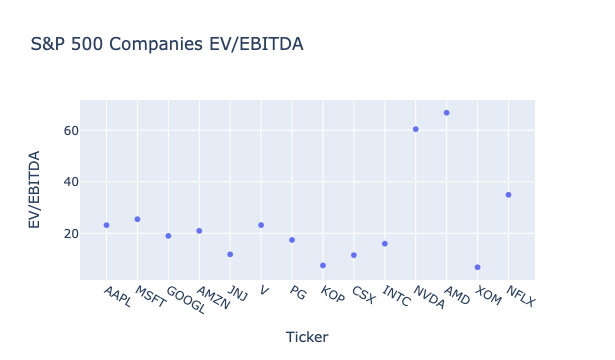

In [14]:
import pandas as pd
import yfinance as yf
import plotly.express as px
from tqdm import tqdm
import time

# Use an existing list of S&P 500 tickers
sp500_tickers = [
    "AAPL", "MSFT", "GOOGL", "AMZN", "FB", "BRK.B", "JNJ", "JPM", "V", "PG", "KOP", "CSX", "INTC", "NVDA", "AMD", "XOM", "NFLX"
    # Add more tickers here...
]

# Create a DataFrame with S&P 500 tickers
sp500_df = pd.DataFrame(sp500_tickers, columns=["Ticker"])

# Function to get EV/EBITDA
def get_ev_ebitda(ticker):
    try:
        stock = yf.Ticker(ticker)
        info = stock.info
        enterprise_value = info.get('enterpriseValue', None)
        ebitda = info.get('ebitda', None)
        if enterprise_value is None or ebitda is None:
            return None
        ev_ebitda = enterprise_value / ebitda
        return ev_ebitda
    except Exception as e:
        print(f"Error fetching data for {ticker}: {e}")
        return None

# List to collect data rows
data_rows = []

# Iterate over the S&P 500 companies and get their EV/EBITDA
for ticker in tqdm(sp500_df['Ticker']):
    company = yf.Ticker(ticker).info.get('shortName')
    ev_ebitda = get_ev_ebitda(ticker)
    data_rows.append({'Ticker': ticker, 'Company': company, 'EV/EBITDA': ev_ebitda})
    time.sleep(0.5)  # Adding a delay to avoid rate limiting

# Create DataFrame from the collected data
ev_ebitda_df = pd.DataFrame(data_rows)

# Remove rows with None values in 'EV/EBITDA'
ev_ebitda_df = ev_ebitda_df.dropna(subset=['EV/EBITDA'])

# Create an interactive scatterplot using Plotly
fig = px.scatter(ev_ebitda_df, x='Ticker', y='EV/EBITDA', hover_name='Company', title='S&P 500 Companies EV/EBITDA')
fig.update_layout(xaxis_title='Ticker', yaxis_title='EV/EBITDA')
fig.show()
